In [24]:
from predict import predict
from displayData import displayData
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from nnCostFunction import nnCostFunction
from checkNNGradients import checkNNGradients
from fmincg import fmincg
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
input_layer_size = 400     # 20x20 Input Images of Digits
hidden_layer_size = 25     # 25 hidden units
num_labels = 10            # 10 labels, from 0 to 9

In [21]:
mat = scipy.io.loadmat('digitdata.mat')
X = mat['X']
y = mat['y']
y = np.squeeze(y)
m, _ = np.shape(X)

SyntaxError: invalid syntax (2443690319.py, line 2)

[2811 4259 2893  730 1464 4942 3799 3960 1683 2166 3954 3431  335 2665
 3557 3993 3985 2615 3065 3528 4502 4728 4138  591 3230 4959 1233 1405
 1478 3358 2353 3764 2619 4250 1244 4537 4066 2688 2390 4597 3601 2074
 3727 2243 1989 2919 4495 4965 3801 3456 2448 2741 2986  819 3491 1676
 3766 1881 2269 2667  312 3907 1615  510 2683 3474 1973 1396 4555 1943
 3647 4280  712 2312 2539 2853 1329  232 3825 1529  232 2682 2795 1553
 2579  903 2789 2442 2889  408 2796  178  969 2795 3436 3817 4740 1857
 2535 2482]
[ 5  8  5  1  2  9  7  7  3  4  7  6 10  5  7  7  7  5  6  7  9  9  8  1
  6  9  2  2  2  6  4  7  5  8  2  9  8  5  4  9  7  4  7  4  3  5  8  9
  7  6  4  5  5  1  6  3  7  3  4  5 10  7  3  1  5  6  3  2  9  3  7  8
  1  4  5  5  2 10  7  3 10  5  5  3  5  1  5  4  5 10  5 10  1  5  6  7
  9  3  5  4]


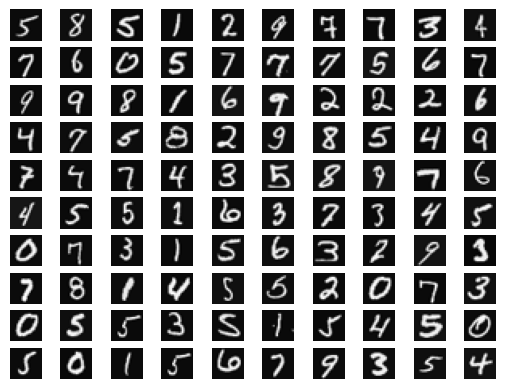

In [ ]:

# Randomly select 100 data points to display
choose_indexes = np.random.choice(range(X.shape[0]), 100)
print(choose_indexes)
Xs = X[choose_indexes, :]
Ys = y[choose_indexes]
print(Ys)

displayData(Xs)

In [ ]:
# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('debugweights.mat')

# Unroll parameters
Theta1 = mat['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = mat['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

In [ ]:
pred = predict(Theta1, Theta2, Xs)
print('Training Set Accuracy: ', (pred == Ys).mean()*100)
print(Ys[:100])
print(pred[:100])

Training Set Accuracy:  99.0
[ 5  8  5  1  2  9  7  7  3  4  7  6 10  5  7  7  7  5  6  7  9  9  8  1
  6  9  2  2  2  6  4  7  5  8  2  9  8  5  4  9  7  4  7  4  3  5  8  9
  7  6  4  5  5  1  6  3  7  3  4  5 10  7  3  1  5  6  3  2  9  3  7  8
  1  4  5  5  2 10  7  3 10  5  5  3  5  1  5  4  5 10  5 10  1  5  6  7
  9  3  5  4]
[ 5.  8.  5.  1.  2.  9.  7.  7.  3.  1.  7.  6. 10.  5.  7.  7.  7.  5.
  6.  7.  9.  9.  8.  1.  6.  9.  2.  2.  2.  6.  4.  7.  5.  8.  2.  9.
  8.  5.  4.  9.  7.  4.  7.  4.  3.  5.  8.  9.  7.  6.  4.  5.  5.  1.
  6.  3.  7.  3.  4.  5. 10.  7.  3.  1.  5.  6.  3.  2.  9.  3.  7.  8.
  1.  4.  5.  5.  2. 10.  7.  3. 10.  5.  5.  3.  5.  1.  5.  4.  5. 10.
  5. 10.  1.  5.  6.  7.  9.  3.  5.  4.]


In [ ]:
predictions = predict(Theta1, Theta2, X)
print(predictions)
print(y)
print('Training Set Accuracy: ', (predictions == y).mean()*100)

[10. 10. 10. ...  9.  9.  9.]
[10 10 10 ...  9  9  9]
Training Set Accuracy:  97.52


In [ ]:
from sigmoid import sigmoid
def extract_weights(nn_params, input_layer_size, hidden_layer_size, num_labels):
    tmp = nn_params.copy()
    # Take first 401*25 values and put the m into an 401x25 grid
    division_point =hidden_layer_size * (input_layer_size + 1)
    Theta1 = np.reshape(tmp[0:division_point], (hidden_layer_size, (input_layer_size + 1)), order='F')
    # Take second 26*10 values and put the m into an 26*10 grid
    Theta2 = np.reshape(tmp[division_point:len(tmp)], (num_labels, (hidden_layer_size + 1)), order='F')
    return Theta1, Theta2

def forward_propagation(training_instance_count, Theta1, Theta2, X):
    a2 = sigmoid(np.dot(np.hstack((np.ones((training_instance_count, 1)), X)), np.transpose(Theta1)))
    a3 = sigmoid(np.dot(np.hstack((np.ones((training_instance_count, 1)), a2)), np.transpose(Theta2)))
    return a2, a3

Theta, Theta2 =extract_weights(nn_params, input_layer_size, hidden_layer_size, num_labels)

# 5000 instances
training_instance_count = np.shape(X)[0]

a2, a3 = forward_propagation(training_instance_count,Theta, Theta2, X)




In [ ]:
cost_per_class = np.zeros((num_labels, 1))
for k in range(1):
    # Array with True, where class matches (k + 1)
    y_binary=(y==k+1)
    print("For k = ", k)
    # print(y_binary.shape)
    # Array that is the k-th column of a3. a3 has all the weighted class predictions
    # hk has all the prediction weights for a specific class
    hk=a3[:,k]
    print("hk",hk.shape)
    print(hk)
    # compute two parts of cost function for all examples for node k
    l = np.log(hk)
    print("l", l)
    first_thing = np.transpose(y_binary)*l
    print("first_thing",first_thing.shape)
    print(first_thing)
    second_thing = ((1-np.transpose(y_binary))*np.log(1-hk))
    print("second_thing",second_thing.shape)
    print(second_thing)
    cost_per_class[k] = np.sum(first_thing) + np.sum(second_thing)


cost_per_class

For k =  0
hk (5000,)
[1.12661530e-04 4.79026796e-04 8.85702310e-05 ... 5.17641791e-02
 8.30631310e-04 4.81465717e-05]
l [-9.09112254 -7.64375402 -9.33171475 ... -2.96105689 -7.09332453
 -9.94126062]
first_thing (5000,)
[-0. -0. -0. ... -0. -0. -0.]
second_thing (5000,)
[-1.12667877e-04 -4.79141566e-04 -8.85741535e-05 ... -5.31520515e-02
 -8.30976475e-04 -4.81477308e-05]


array([[-105.77238482],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ]])

In [ ]:
a1 = np.array([1, 2, 3, 4, 5])
print(np.squeeze(a1))
a2 = np.array([1, 2, 3, 4, 5])

# np.dot(a1, a2)


[1 2 3 4 5]


In [ ]:
def calculate_activations(X, Theta1, Theta2, t):
    a1 = append_one(X[t])

    z2 = np.dot(a1, Theta1.T)
    a2 = append_one(sigmoid(z2))

    z3 = np.dot(a2, Theta2.T)
    a3 = sigmoid(z3)

    return a3, z2, a2, a1


def append_one(z):
    return np.append(1, z)


def one_hot(y, classes):
    array = np.zeros([classes])
    array[y - 1] = 1
    return array


def list_of_elements(array):
    # Adds one dimension to the array, putting each element in its separate list
    return np.array([[i] for i in array])


def gradient2(a2, dz3):
    p1 = list_of_elements(a2)
    p2 = list_of_elements(dz3)
    return np.dot(p1, p2.T)


def gradient1(dz2, a1):
    p1 = list_of_elements(a1)
    return np.dot(dz2, p1.T)


def calculate_gradients(a3, z2, a2, a1, t, y):
    # We subtract
    dz3 = a3 - one_hot(y[t], a3.shape[0])

    dw2 = gradient2(a2, dz3)
    # Leave out the error or the previous bias, the bias of weights2 will already be affected
    # Add a dimension to dz3, so that we can take the dot product of this matrix
    sg2 = list_of_elements(sigmoidGradient(z2))
    dz2 = np.dot(dw2[1:], list_of_elements(dz3)) * sg2

    dw1 = gradient1(dz2, a1)
    return dw1, dw2.T


def backpropagate(X, y, Theta1, Theta2, t, learning_rate):
    # X are the features of each training instance
    # y are the correct classes
    # t is the index of the instance that we are backpropagating over
    a3, z2, a2, a1 = calculate_activations(X, Theta1, Theta2, t)
    dw1, dw2 = calculate_gradients(a3, z2, a2, a1, t, y)
    return dw1, dw2


def accumulate_grad(X, y, Theta1, Theta2, learning_rate):
    accumulated_grad1 = np.zeros(np.shape(Theta1))
    accumulated_grad2 = np.zeros(np.shape(Theta2))
    for t in range(X.shape[0]):
    # here we calculate the modified values of the new weights for both layers
        dw1, dw2 = backpropagate(X, y, Theta1, Theta2, t, learning_rate)
        accumulated_grad1 += dw1
        accumulated_grad2 += dw2
    return accumulated_grad1, accumulated_grad2


origin_T1 = Theta1.copy()
origin_T2 = Theta2.copy()

accumulated_grad1, accumulated_grad2 = accumulate_grad(X, y, Theta1, Theta2, 0.1)

print(accumulated_grad1.shape)
print(accumulated_grad1[0])
print(accumulated_grad2.shape)
# print((origin_T1 - Theta1)[:10, :4])
# print((origin_T2 - Theta2)[:10,:10])


(25, 401)
[ 2.01125134e+01  0.00000000e+00  0.00000000e+00  6.78927489e-07
 -7.70519767e-06  1.22386517e-05  7.88803656e-05  9.70123541e-04
 -6.01592663e-04 -7.65710121e-04 -8.19870542e-04 -1.83195238e-04
 -7.13240719e-05 -1.12191277e-04 -9.70139590e-04 -9.92905969e-04
 -2.58309416e-05  2.51861709e-06 -3.92434805e-07  6.22695828e-08
  0.00000000e+00  4.44194156e-10  5.88561149e-08  1.78558408e-05
 -9.27165315e-05 -1.37750737e-03 -2.90610186e-03 -2.57426637e-03
  9.45877125e-03  1.66816883e-03 -7.25574912e-04 -7.21184386e-03
 -9.03850836e-03 -8.64378093e-03  2.54893642e-03  5.82513121e-03
 -1.67296052e-03 -1.00736596e-03 -1.42707549e-03 -9.95812013e-05
 -7.83722024e-06  5.66776260e-08  2.01888966e-06 -2.90048077e-04
  9.31647292e-04  2.04853307e-02  7.78898262e-02  9.59607270e-02
  1.60815198e-01  1.52480869e-01  1.40233729e-01  8.51099255e-02
  6.97466666e-02  6.42121769e-02  8.51869977e-02  8.79364919e-02
  1.72481422e-02  6.73369378e-03  2.32312836e-02 -6.07803789e-04
  2.71541854e-0

In [ ]:
def calculate_connection_strength(users, movies):
    connections = np.dot(users, movies.T)
    df = pd.DataFrame(data=connections, index=users, columns=movies)
    return df    

# User(comedy, action)
user_ratings = np.array([[3, 0], [2, 2], [4, 4], [0, 4]])
# Movie(comedy, action)
movie_categories = np.array([[1, 3], [0, 4], [4, 3], [1, 2], [4, 0]])

users


print(users)
print(movies.T)

connections = calculate_connection_strength(user_ratings, movie_categories)
print(connections)

NameError: name 'users' is not defined

In [ ]:
a = np.array([2,55,6,8])
b = np.array([5,6,8,0])

# np.hstack([a,b])
# np.dot(list_of_elements(a),list_of_elements(b).T)
c = list_of_elements(a) * list_of_elements(b).T
print(c)

def zero_first_column(theta):
    for i in range(theta.shape[0]):
        theta[i,0] = 0
    return theta

print(zero_first_column(c))

[[ 10  12  16   0]
 [275 330 440   0]
 [ 30  36  48   0]
 [ 40  48  64   0]]
[[  0  12  16   0]
 [  0 330 440   0]
 [  0  36  48   0]
 [  0  48  64   0]]


Text(0.5, 1.0, 'Drop in error over the course in training')

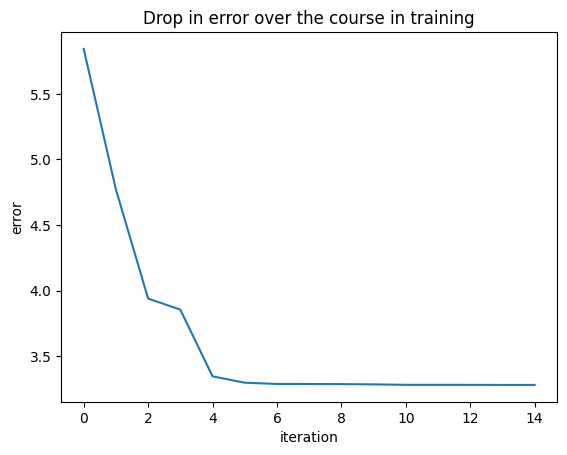

In [27]:
a = np.array([5.8423585, 4.77170489, 3.93990423, 3.85549929, 3.34727825, 3.29860861, 3.28924142,
             3.28879957, 3.28783845, 3.28599737, 3.28257185, 3.28256352, 3.28225013, 3.28179442, 3.28178149])
a
plt.plot(a)
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Drop in error over the course in training")